# **Clasificacion de prendas de ropa**

Vamos a usar el dataset de Fashion MNIST que hace parte de Keras, que trae varias imagenes de ropa clasificadas que podemos usar en un **problema de clasificacion multiclase**

A lo largo del notebook, veremos cómo aplicar diferentes optimizadores, funciones de costo, esquemas de entrenamiento y técnicas de regularización para mejorar el rendimiento del modelo.

## **Primera parte: Los datos**

In [1]:
# Importar librerías esenciales
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


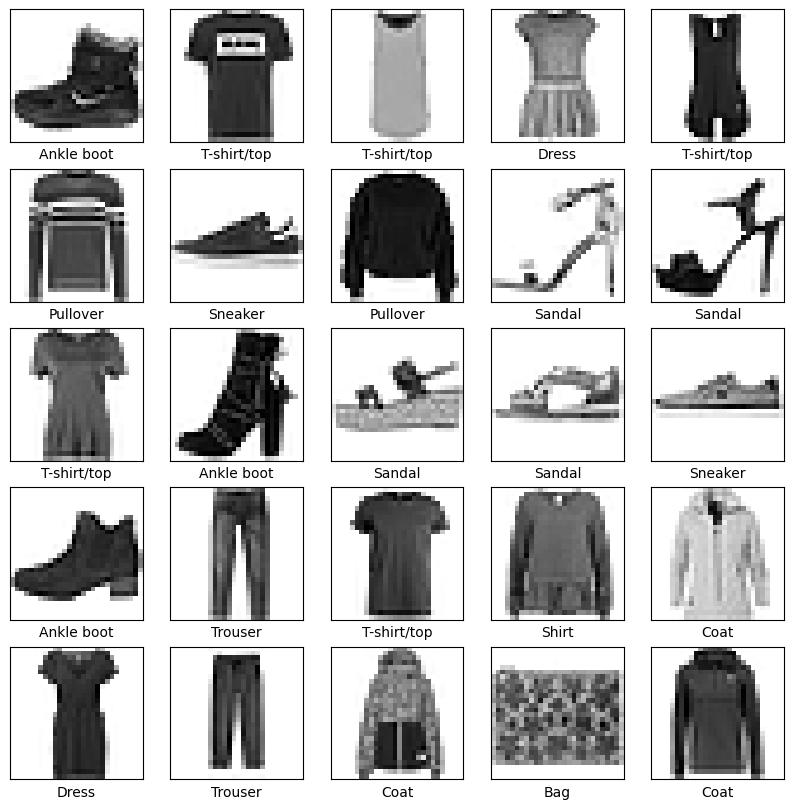

In [2]:
# Cargar el dataset Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar los valores de píxeles entre 0 y 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Mostrar algunas imágenes de entrenamiento
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


Tip: recuerda siempre revisar la estructura de los datos que estas utilizando, de esta manera evitaras errores a la hora de crear tus modelos

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
X_train[0].max(), X_train[0].min()

(1.0, 0.0)

## **Segunda parte: Creando el modelo base**



In [5]:
# Definir un modelo simple de red neuronal
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Entrenamos el modelo con los parámetros básicos
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6671 - loss: 1.0369 - val_accuracy: 0.8027 - val_loss: 0.5721
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8207 - loss: 0.5322 - val_accuracy: 0.8204 - val_loss: 0.5135
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8367 - loss: 0.4761 - val_accuracy: 0.8269 - val_loss: 0.4862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8455 - loss: 0.4450 - val_accuracy: 0.8380 - val_loss: 0.4604
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8503 - loss: 0.4279 - val_accuracy: 0.8434 - val_loss: 0.4474
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8562 - loss: 0.4154 - val_accuracy: 0.8472 - val_loss: 0.4344
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8607 - loss: 0.4096 - val_accuracy: 0.8434 - val_loss: 0.4409
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8655 - loss: 0.3935 - 

## **Tercera parte: Probando Optimizadores**


In [7]:
# Cambiar el optimizador a Adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos con Adam
history_adam = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8477 - loss: 0.4269 - val_accuracy: 0.8411 - val_loss: 0.4292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8688 - loss: 0.3607 - val_accuracy: 0.8604 - val_loss: 0.3798
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8828 - loss: 0.3231 - val_accuracy: 0.8671 - val_loss: 0.3746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8875 - loss: 0.3065 - val_accuracy: 0.8728 - val_loss: 0.3535
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.2909 - val_accuracy: 0.8771 - val_loss: 0.3398
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8970 - loss: 0.2755 - val_accuracy: 0.8779 - val_loss: 0.3470
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9007 - loss: 0.2655 - val_accuracy: 0.8799 - val_loss: 0.3490
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9046 - loss: 0.2536 - 

## **Cuarta parte: Funciones de costo**

In [8]:
from tensorflow.keras.utils import to_categorical

# Convertir etiquetas a one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Utilizar una función de costo distinta (por ejemplo, Hinge loss para problemas de clasificación)
model.compile(optimizer='adam',
              loss="categorical_hinge",
              metrics=['accuracy'])

# Entrenar el modelo
history_hinge = model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9065 - loss: 0.2110 - val_accuracy: 0.8748 - val_loss: 0.2575
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9059 - loss: 0.1995 - val_accuracy: 0.8750 - val_loss: 0.2536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9104 - loss: 0.1880 - val_accuracy: 0.8825 - val_loss: 0.2394
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9103 - loss: 0.1874 - val_accuracy: 0.8870 - val_loss: 0.2319
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9155 - loss: 0.1760 - val_accuracy: 0.8840 - val_loss: 0.2325
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9175 - loss: 0.1705 - val_accuracy: 0.8780 - val_loss: 0.2445
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9206 - loss: 0.1669 - val_accuracy: 0.8867 - val_loss: 0.2322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9175 - loss: 0.1716 - 

## **Regularizacion para evitar el overfitting**

In [9]:
# Añadir capas de Dropout para regularizar
model_reg = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Añadir Dropout con tasa del 50% que apaga la mitad de las neuronas de la capa de arriba al azar por epoca
    layers.Dense(10, activation='softmax')
])

# Compilar y entrenar el modelo
model_reg.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_reg = model_reg.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7227 - loss: 0.7944 - val_accuracy: 0.8371 - val_loss: 0.4460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8282 - loss: 0.4796 - val_accuracy: 0.8476 - val_loss: 0.4256
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8406 - loss: 0.4380 - val_accuracy: 0.8561 - val_loss: 0.4015
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8486 - loss: 0.4158 - val_accuracy: 0.8641 - val_loss: 0.3853
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8526 - loss: 0.4021 - val_accuracy: 0.8659 - val_loss: 0.3770
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8561 - loss: 0.3975 - val_accuracy: 0.8651 - val_loss: 0.3732
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3866 - val_accuracy: 0.8656 - val_loss: 0.3702
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8613 - loss: 0.3812 - 

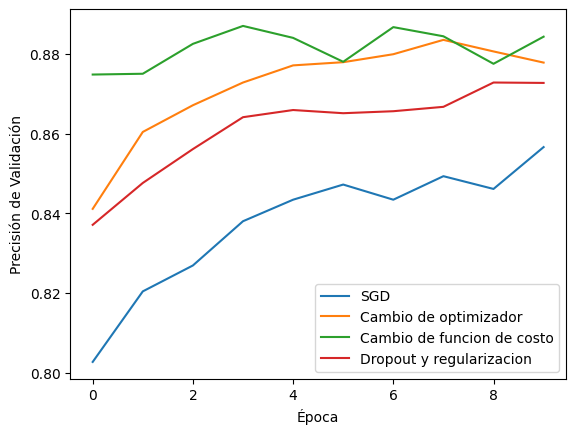

In [10]:
plt.plot(history.history['val_accuracy'], label='SGD')
plt.plot(history_adam.history['val_accuracy'], label='Cambio de optimizador')
plt.plot(history_hinge.history['val_accuracy'], label='Cambio de funcion de costo')
plt.plot(history_reg.history['val_accuracy'], label='Dropout y regularizacion')
plt.xlabel('Época')
plt.ylabel('Precisión de Validación')
plt.legend()
plt.show()